In [2]:
# Imports
import cv2
import matplotlib.pyplot as plt
import os

import chess
import chess.svg
from IPython.display import display, SVG

## Frame extraction - chess_video_1

In [3]:
def extract_frame(video_path, frame_number, desired_size=(1280, 720)):
    """
    Extracts a specific frame from a video.

    Parameters:
    - video_path (str): Path to the video file.
    - frame_number (int): The frame number to extract.
    - desired_size (tuple): Desired size (width, height) to which the frame should be resized.

    Returns:
    - frame (numpy.ndarray): Extracted and resized frame as an image array.
    """
    
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Set the frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    
    # Read the frame
    ret, frame = cap.read()
    
    if ret:
        frame = cv2.resize(frame, desired_size)
        return frame
    return None

def zoom_in_on_frame(frame, top_left, bottom_right):
    """
    Zoom in on a specific region of a frame.
    
    Parameters:
    - frame: Input image.
    - top_left: Tuple (x, y) for the top-left corner of the region.
    - bottom_right: Tuple (x, y) for the bottom-right corner of the region.
    
    Returns:
    - Zoomed image.
    """
    # Crop the region of interest
    cropped_region = frame[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
    
    # Resize the cropped region to the size of the original image
    # zoomed_in = cv2.resize(cropped_region, (frame.shape[1], frame.shape[0]))
    
    return cropped_region

def display_frame(frame):
    """
    Display a frame using matplotlib.

    Parameters:
    - frame (numpy.ndarray): The frame in BGR format.

    Returns:
    None
    """
    
    # Convert the frame from BGR to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Display the frame using matplotlib
    plt.imshow(rgb_frame)
    plt.axis('off')  # Hide axes
    plt.show()
    
def save_extracted_frame(frame, output_folder, frame_number):
    """
    Saves a pre-extracted frame to a specified folder.

    Parameters:
    - frame (numpy.ndarray): The frame to save.
    - output_folder (str): Folder where the frame will be saved.
    - frame_number (int): The frame number (used in the file name).

    Returns:
    - str: The path to the saved frame.
    """
    
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Define the file name based on the frame number
    frame_filename = os.path.join(output_folder, f"frame_{frame_number}.jpg")
    
    # Save the frame
    cv2.imwrite(frame_filename, frame)

    return frame_filename

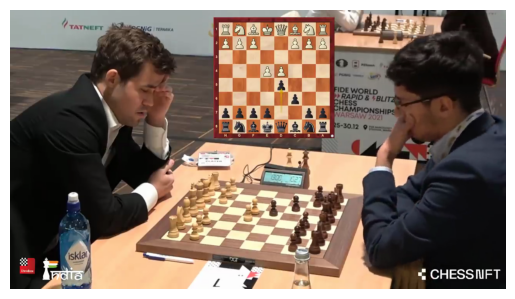

In [4]:
# Test example 
video_file = "../ChessStreamComputerVision/chess_videos/chess_video_1.mp4"
frame_to_extract = 4000
extracted_frame = extract_frame(video_file, frame_to_extract)

# Display the frame in Jupyter notebook using matplotlib
if extracted_frame is not None:
    display_frame(extracted_frame)

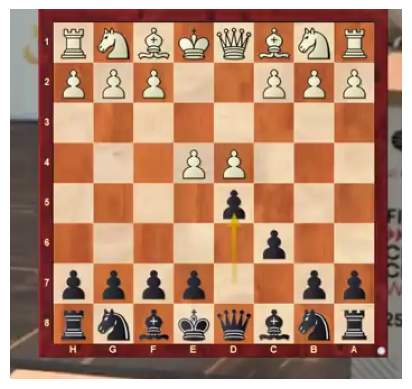

In [5]:
# Define top-left and bottom right corner for digital board
top_left_digital = (500, 20)
bottom_right_digital = (850, 350)

# Get the zoomed in digital board
digital_board = zoom_in_on_frame(extracted_frame, top_left_digital, bottom_right_digital)

# Display digital board
display_frame(digital_board)

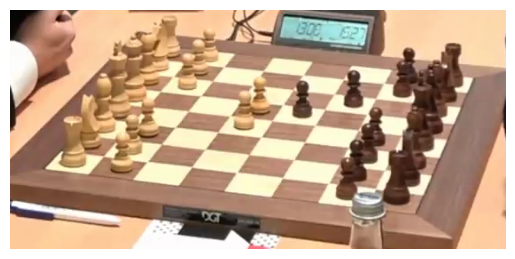

In [6]:
# Define top-left and bottom right corner for physical board
top_left_physical = (350, 410)
bottom_right_physical = (910, 680)

# Get the zoomed in frame
physical_board = zoom_in_on_frame(extracted_frame, top_left_physical, bottom_right_physical)

# Display zoomed in frame
display_frame(physical_board)

In [7]:
# Get lists of digital/physical boards from video 1
digital_boards = []
physical_boards = []
path_to_digital_board_folder = "digital_board_frames/"
path_to_physical_board_folder = "physical_board_frames/"
for frame_to_extract in range(4000, 20001, 4000): 
    # Extract frame
    extracted_frame = extract_frame(video_file, frame_to_extract)
    
    # Zoom in on boards
    digital_board = zoom_in_on_frame(extracted_frame, top_left_digital, bottom_right_digital)
    physical_board = zoom_in_on_frame(extracted_frame, top_left_physical, bottom_right_physical)

    # Add boards to board lists
    digital_boards.append(digital_board)
    physical_boards.append(physical_board)
    
    # Save boards to folders
    save_extracted_frame(digital_board, path_to_digital_board_folder, frame_to_extract)
    save_extracted_frame(physical_board, path_to_physical_board_folder, frame_to_extract)

## Test ChessVision on digital board
- https://github.com/gudbrandtandberg/ChessVision

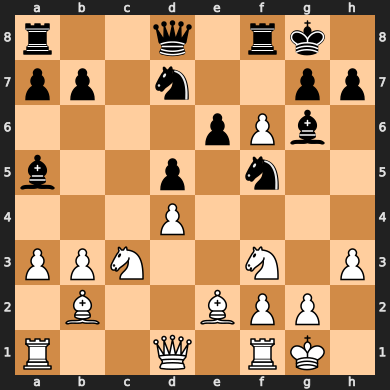

In [8]:
# Define the FEN string
fen_string = "r2q1rk1/pp1n2pp/4pPb1/b2p1n2/3P4/PPN2N1P/1B2BPP1/R2Q1RK1 w - - 0 1"

# Convert the FEN string to a board
board = chess.Board(fen=fen_string)

# Display the board as an SVG image
display(SVG(chess.svg.board(board=board)))